In [673]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import skimage.morphology as morph

In [674]:
def plot_image(image):
    plt.imshow(image, cmap='gray')
    plt.show()

In [870]:
prueba1 = cv2.imread('database/2_gt.pgm', cv2.IMREAD_UNCHANGED)

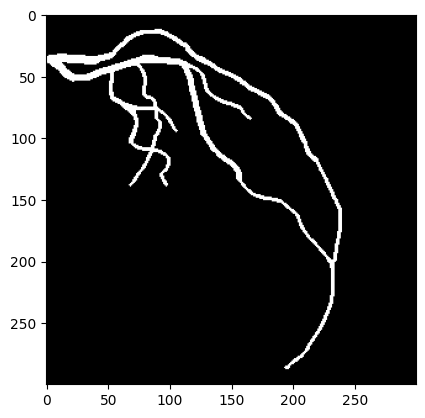

In [871]:
plot_image(prueba1)

In [872]:
def esqueletizar(imagen):
    return morph.skeletonize(imagen).astype(np.uint8)

In [873]:
def closing(imagen, kernel):
    return morph.closing(imagen, kernel)

In [874]:
def opening(imagen, kernel):
    return morph.opening(imagen, kernel)

In [875]:
def erosion(imagen, kernel):
    return morph.erosion(imagen, kernel)

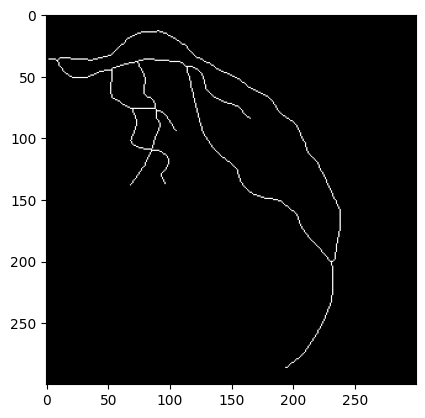

In [876]:
esqueleto = esqueletizar(prueba1)
plot_image(esqueleto)

In [877]:
graph = {}

In [878]:
class Node(object):
    x = 0
    y = 0

    def set_position(self, x, y):
        self.x = x
        self.y = y

    def get_position(self):
        return (self.x, self.y)

In [879]:
def check_neighbors(x, y, image):
    neighbors = []
    down = False
    up = False
    right = False
    left = False
    # left 
    if x > 0 and image[x-1, y] == 1:
        neighbors.append((x-1, y))
        left = True
    # right
    if x < image.shape[0] - 1 and image[x+1, y] == 1:
        neighbors.append((x+1, y))
        right = True
    # up
    if y > 0 and image[x, y-1] == 1:
        neighbors.append((x, y-1))
        up = True
    # down
    if y < image.shape[1] - 1 and image[x, y+1] == 1:
        neighbors.append((x, y+1))
        down = True
    # upper left
    if x > 0 and y > 0 and image[x-1, y-1] == 1 and not (up or left):
        neighbors.append((x-1, y-1))
    # lower left
    if x > 0 and y < image.shape[1] - 1 and image[x-1, y+1] == 1 and not (down or left):
        neighbors.append((x-1, y+1))
    # upper right
    if x < image.shape[0] - 1 and y > 0 and image[x+1, y-1] == 1 and not (up or right):
        neighbors.append((x+1, y-1))
    # lower right
    if x < image.shape[0] - 1 and y < image.shape[1] - 1 and image[x+1, y+1] == 1 and not (down or right):
        neighbors.append((x+1, y+1))
    return neighbors

In [880]:
def construct_graph(imagen):
    imagen = imagen.copy()
    bifurcation = []
    trifurcation = []
    end_points = []
    intemediate = []
    cont = 0
    mod = 45
    for i in range(imagen.shape[0]):
        for j in range(imagen.shape[1]):
            if imagen[i][j] == 1:
                node = Node()
                node.set_position(i, j)
                graph[(i, j)] = node
                neighbors = check_neighbors(i, j, imagen)
                if len(neighbors) == 3:
                    bifurcation.append((i, j))
                if len(neighbors) == 4:
                    trifurcation.append((i, j))
                if len(neighbors) == 1:
                    end_points.append((i, j))
                if len(neighbors) == 2:
                    if cont % mod == 0:
                        intemediate.append((i, j))
                cont += 1   
                
    return graph, bifurcation, trifurcation, end_points, intemediate

In [881]:
_, bifurcation, trifurcation, end_points, intermediate = construct_graph(esqueleto)

In [882]:
bifurcation

[(37, 9),
 (38, 74),
 (42, 114),
 (45, 53),
 (76, 70),
 (76, 88),
 (78, 89),
 (109, 85),
 (110, 85),
 (200, 231)]

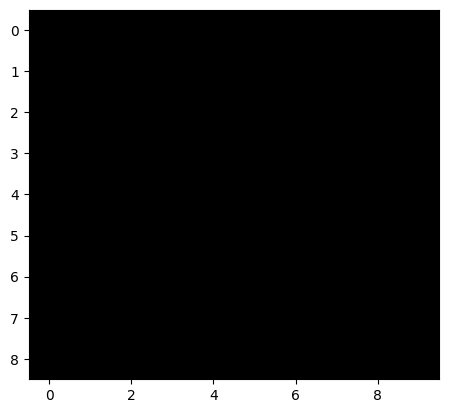

In [883]:
# temp = esqueleto[28:35, 160:170]
# temp = esqueleto[28:35, 160:170]
temp = esqueleto[41:50, 220:230]
# print(temp)
plot_image(temp)

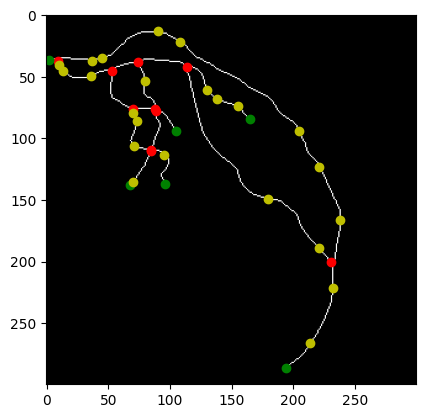

In [885]:
plt.imshow(esqueleto, cmap='gray')

x = [coord[1] for coord in bifurcation]
y = [coord[0] for coord in bifurcation]
plt.plot(x, y, 'ro')

x2 = [coord[1] for coord in trifurcation]
y2 = [coord[0] for coord in trifurcation]
plt.plot(x2, y2, 'bo')

x3 = [coord[1] for coord in end_points]
y3 = [coord[0] for coord in end_points]
plt.plot(x3, y3, 'go')

x4 = [coord[1] for coord in intermediate]
y4 = [coord[0] for coord in intermediate]
plt.plot(x4, y4, 'yo')

plt.show()

In [887]:
result = bifurcation + trifurcation + end_points + intermediate

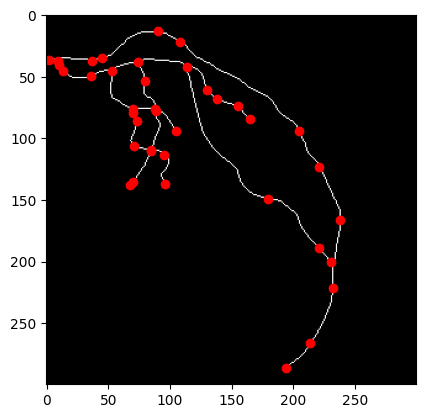

In [892]:
x = [coord[1] for coord in result]
y = [coord[0] for coord in result]
plt.plot(x, y, 'ro')
plt.imshow(esqueleto, cmap='gray')
plt.show()